# Assignment Day 7 | 14th July 2020

#### Junior Peña

### Problem Statement

A large company named XYZ, employs, at any given point of time, around 4000 employees. However, every year, around 15% of its employees leave the company and need to be replaced with the talent pool available in the job market. The management believes that this level of attrition (employees leaving, either on their own or because they got fired) is bad for the company, because of the following reasons:

1. The former employees’ projects get delayed, which makes it difficult to meet timelines, resulting in a reputation loss among consumers and partners.
2. A sizeable department has to be maintained, for the purposes of recruiting new talent.
3. More often than not, the new employees have to be trained for the job and/or given time to acclimatise themselves to the company.

Hence, the management has contracted an HR analytics firm to understand what factors they should focus on, in order to curb attrition. In other words, they want to know what changes they should make to their workplace, in order to get most of their employees to stay. Also, they want to know which of these variables is most important and needs to be addressed right away.

### Objective

Goal of the case study You are required to model the probability of attrition. The results thus obtained will be used by the management to understand what changes they should make to their workplace, in order to get most of their employees to stay.

### Step 1 - Launching

In this step we are going to import the libraries required to work with the dataset as well as getting to know the information inside the file.

In [1]:
#Import the libraries
import pandas as pd
import numpy as np
import seaborn as sb
import textwrap
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Using Pandas to import the file
df = pd.read_csv("C:\\Users\\junio\\Day 7\\general_data.csv")
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [3]:
#Print the dataset to know the number of rown and columns
df

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,3.0,Y,17,8,1,10.0,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,2.0,Y,15,8,0,10.0,2,3,0,2
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,0.0,Y,20,8,0,5.0,4,4,1,2
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,...,0.0,Y,14,8,1,10.0,2,9,7,8


### Step 2 - Data Treatment

We can now check if there are any null values in each row. If there are null value, we are going to use the '.dropna' function to remove them as this can affect the results calculation and visualization.

In [4]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

We can see that there are null values in the column of 'NumCompaniesWorked'. We can choose to fill it with random or mean values, but as there isn't a large number of them, we are going to delete the rows.

In [5]:
df.dropna(inplace=True)
df.isnull().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

### Step 3 - Univariate Analysis

Univariate analysis is the technique of comparing and analyzing the dependency of a single predictor and a response variable. The prefix "uni" means one, emphasizing the fact that the analysis only accounts for one variable's effect on a dependent variable. Univariate Analysis is thought to be one of the simplest forms of data analysis as it doesn't deal with causes or relationships, like a regression would. Primarily, Univariate Analysis simply takes data and provides a summary and associated patterns. 

#### Summarized results

In [6]:
#Show a brief summary of descriptive statistics of our dataset columns
df.describe()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4382.000000,4382.000000,4382.000000,4382.0,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.0,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000
mean,36.933364,9.198996,2.912369,1.0,2207.804884,2.063898,65061.702419,2.693291,15.210634,8.0,0.794614,11.290278,2.798266,7.010497,2.191693,4.126198
std,9.137272,8.105396,1.024728,0.0,1271.688783,1.106115,47142.310175,2.497832,3.663007,0.0,0.852397,7.785717,1.289402,6.129351,3.224994,3.569674
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,1.0,1108.250000,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,1.0,2208.500000,2.000000,49190.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3308.750000,3.000000,83790.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,1.0,4409.000000,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


####  Descriptive Statistics

As not all the columns have values which will help us analyse the behavior of the Attrition, we are going to perform the descriptive statistics on some columns.

In [7]:
#Show a brief summary of descriptive statistics
df[['Age','DistanceFromHome','Education','MonthlyIncome',
'NumCompaniesWorked', 'PercentSalaryHike','TotalWorkingYears', 'TrainingTimesLastYear',
'YearsAtCompany','YearsSinceLastPromotion', 'YearsWithCurrManager']].describe()

,Age,DistanceFromHome,Education,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000
mean,36.933364,9.198996,2.912369,65061.702419,2.693291,15.210634,11.290278,2.798266,7.010497,2.191693,4.126198
std,9.137272,8.105396,1.024728,47142.310175,2.497832,3.663007,7.785717,1.289402,6.129351,3.224994,3.569674
min,18.000000,1.000000,1.000000,10090.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,29110.000000,1.000000,12.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,49190.000000,2.000000,14.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,83790.000000,4.000000,18.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,199990.000000,9.000000,25.000000,40.000000,6.000000,40.000000,15.000000,17.000000


In [8]:
#Check the median values
df[['Age','DistanceFromHome','Education','MonthlyIncome',
'NumCompaniesWorked', 'PercentSalaryHike','TotalWorkingYears', 'TrainingTimesLastYear',
'YearsAtCompany','YearsSinceLastPromotion', 'YearsWithCurrManager']].median()

Age                           36.0
DistanceFromHome               7.0
Education                      3.0
MonthlyIncome              49190.0
NumCompaniesWorked             2.0
PercentSalaryHike             14.0
TotalWorkingYears             10.0
TrainingTimesLastYear          3.0
YearsAtCompany                 5.0
YearsSinceLastPromotion        1.0
YearsWithCurrManager           3.0
dtype: float64

In [9]:
#Check the mode
df[['Age','DistanceFromHome','Education','MonthlyIncome',
'NumCompaniesWorked', 'PercentSalaryHike','TotalWorkingYears', 'TrainingTimesLastYear',
'YearsAtCompany','YearsSinceLastPromotion', 'YearsWithCurrManager']].mode().T

,0
Age,35.0
DistanceFromHome,2.0
Education,3.0
MonthlyIncome,23420.0
NumCompaniesWorked,1.0
PercentSalaryHike,11.0
TotalWorkingYears,10.0
TrainingTimesLastYear,2.0
YearsAtCompany,5.0
YearsSinceLastPromotion,0.0


In [10]:
#Check the variance
df[['Age','DistanceFromHome','Education','MonthlyIncome',
'NumCompaniesWorked', 'PercentSalaryHike','TotalWorkingYears', 'TrainingTimesLastYear',
'YearsAtCompany','YearsSinceLastPromotion', 'YearsWithCurrManager']].var()

Age                        8.348974e+01
DistanceFromHome           6.569744e+01
Education                  1.050068e+00
MonthlyIncome              2.222397e+09
NumCompaniesWorked         6.239165e+00
PercentSalaryHike          1.341762e+01
TotalWorkingYears          6.061739e+01
TrainingTimesLastYear      1.662558e+00
YearsAtCompany             3.756894e+01
YearsSinceLastPromotion    1.040059e+01
YearsWithCurrManager       1.274257e+01
dtype: float64

In [11]:
#Check the skewness
df[['Age','DistanceFromHome','Education','MonthlyIncome',
'NumCompaniesWorked', 'PercentSalaryHike','TotalWorkingYears', 'TrainingTimesLastYear',
'YearsAtCompany','YearsSinceLastPromotion', 'YearsWithCurrManager']].skew()

Age                        0.413048
DistanceFromHome           0.955517
Education                 -0.288977
MonthlyIncome              1.367457
NumCompaniesWorked         1.029174
PercentSalaryHike          0.819510
TotalWorkingYears          1.115419
TrainingTimesLastYear      0.551818
YearsAtCompany             1.764619
YearsSinceLastPromotion    1.980992
YearsWithCurrManager       0.834277
dtype: float64

In [12]:
#Check the kurtosis
df[['Age','DistanceFromHome','Education','MonthlyIncome',
'NumCompaniesWorked', 'PercentSalaryHike','TotalWorkingYears', 'TrainingTimesLastYear',
'YearsAtCompany','YearsSinceLastPromotion', 'YearsWithCurrManager']].kurt()

Age                       -0.409517
DistanceFromHome          -0.230691
Education                 -0.565008
MonthlyIncome              0.990836
NumCompaniesWorked         0.014307
PercentSalaryHike         -0.306951
TotalWorkingYears          0.909316
TrainingTimesLastYear      0.494215
YearsAtCompany             3.930726
YearsSinceLastPromotion    3.592162
YearsWithCurrManager       0.170703
dtype: float64

#### Inference from the analysis

1. All the variables show a positive skewness, except for Education.
2. Age, Distance from home, Education and Percent salary hike show a negative kurtosis, so they are platyokurtic.
3. Monthly income, Number of companies worked, Total working years, Training times last year, Years at company, Years since last promotion and Years with current manager show a positive kurtosis, so they are Leptokurtic.
4. The Mean Monthly Income’s interquartile range (IQR)  is at 54,680 suggesting company wide attrition across all income bands.
5. Mean age’s interquartile range (IQR) is at 13 forming a near normal distribution.

#### Performing analysis with Boxplots and Scatterplots

{'whiskers': [<matplotlib.lines.Line2D at 0x1d8be3a7408>,
 'caps': [<matplotlib.lines.Line2D at 0x1d8be3bdb48>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d8be3aff88>],
 'medians': [<matplotlib.lines.Line2D at 0x1d8be3cbd48>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d8be3cbe08>],
 'means': []}

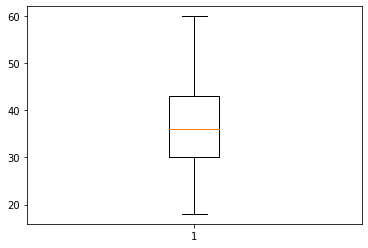

In [13]:
#Boxplot on Age column
box_plot = df.Age
plt.boxplot(box_plot)

Age is normally distributed without any outliers.

{'whiskers': [<matplotlib.lines.Line2D at 0x1d8beae1988>,
 'caps': [<matplotlib.lines.Line2D at 0x1d8beae1b08>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d8beae1208>],
 'medians': [<matplotlib.lines.Line2D at 0x1d8beae6f88>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d8beae6b88>],
 'means': []}

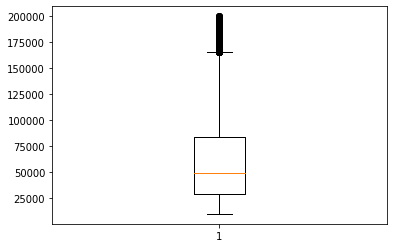

In [14]:
#Boxplot on Monthly income column
box_plot = df.MonthlyIncome
plt.boxplot(box_plot)

Monthly Income is right skewed with several outliers.

{'whiskers': [<matplotlib.lines.Line2D at 0x1d8beb52f88>,
 'caps': [<matplotlib.lines.Line2D at 0x1d8beb59b48>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d8beb52848>],
 'medians': [<matplotlib.lines.Line2D at 0x1d8beb5da88>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d8beb62908>],
 'means': []}

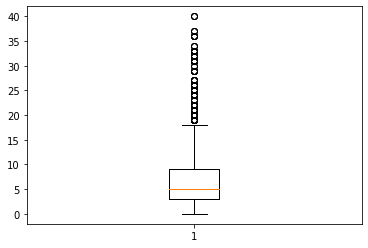

In [15]:
#Boxplot on Years at company column
box_plot = df.YearsAtCompany
plt.boxplot(box_plot)

Years at company is also right skewed with several outliers.

{'whiskers': [<matplotlib.lines.Line2D at 0x1d8bebcbf08>,
 'caps': [<matplotlib.lines.Line2D at 0x1d8bebd1f48>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d8bebcb6c8>],
 'medians': [<matplotlib.lines.Line2D at 0x1d8bebd4a08>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d8bebdaa08>],
 'means': []}

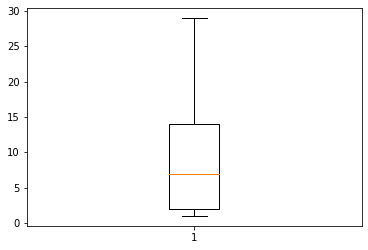

In [16]:
#Boxplot on Distance from home column
box_plot = df.DistanceFromHome
plt.boxplot(box_plot)

Distance from home is right skewed but has no outliers.

{'whiskers': [<matplotlib.lines.Line2D at 0x1d8bec38fc8>,
 'caps': [<matplotlib.lines.Line2D at 0x1d8bec3cb88>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d8bec38848>],
 'medians': [<matplotlib.lines.Line2D at 0x1d8bec3fac8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d8bec45948>],
 'means': []}

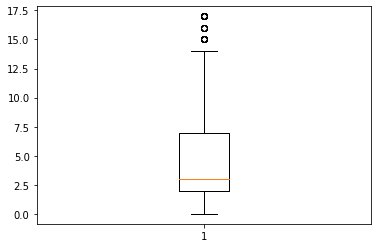

In [17]:
#Boxplot on Years with current manager column
box_plot = df.YearsWithCurrManager
plt.boxplot(box_plot)

Years with current manager is right skewed with just a few outliers.

{'whiskers': [<matplotlib.lines.Line2D at 0x1d8beca8a48>,
 'caps': [<matplotlib.lines.Line2D at 0x1d8becaca08>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d8beca1fc8>],
 'medians': [<matplotlib.lines.Line2D at 0x1d8becaf988>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d8becaffc8>],
 'means': []}

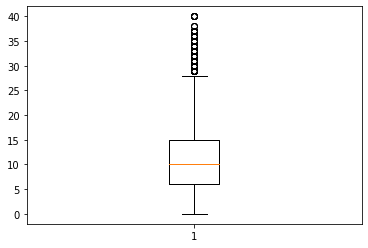

In [18]:
#Boxplot on Total working years column
box_plot = df.TotalWorkingYears
plt.boxplot(box_plot)

Total working years is right skewed with several outliers.

{'whiskers': [<matplotlib.lines.Line2D at 0x1d8bed16c08>,
 'caps': [<matplotlib.lines.Line2D at 0x1d8bed1bb88>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d8bed16248>],
 'medians': [<matplotlib.lines.Line2D at 0x1d8bed20c48>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d8bed20d48>],
 'means': []}

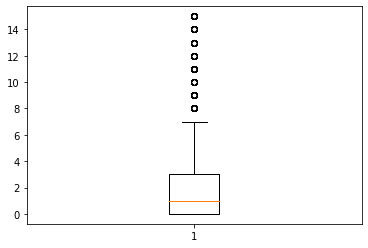

In [19]:
#Boxplot on Years since last promotion column
box_plot = df.YearsSinceLastPromotion
plt.boxplot(box_plot)

Years since last promotion is right skewed with a few  outliers.

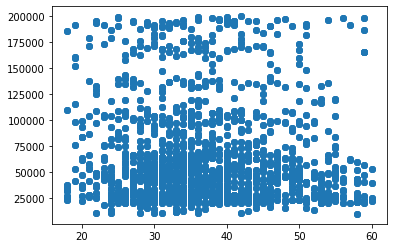

In [20]:
#Scatter plot between Age and Monthly Income
plt.scatter(df.Age, df.MonthlyIncome)

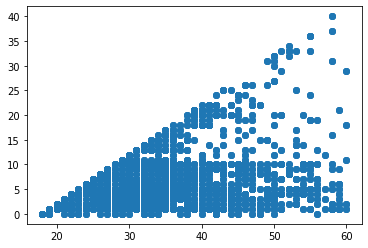

In [21]:
#Scatter plot between Age and Years at company
plt.scatter(df.Age, df.YearsAtCompany)

Most employees are between the ages of 20 and 40. Most of the older employees don't have a lot of years at the company.

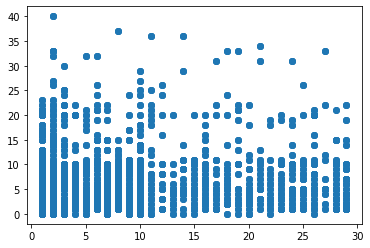

In [22]:
#Scatter plot between Age and Years at company
plt.scatter(df.DistanceFromHome, df.YearsAtCompany)

There’s no regression found while plotting on a scatter plot.

### Step 4 - Visualisation

We are going to visualize the behavior of some variables using different graphs.

To do this, we have to convert the values in the Attrition column to integer using the '.map' function.

In [23]:
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

Now, we are going to create two additional datasets to separate the values in the Attrition column.

In [24]:
df_yes = df[df['Attrition']== 1]
df_no = df[df['Attrition']== 0]

We are going to visualize two graphs with the total of positive and negative Attrition in each Department.

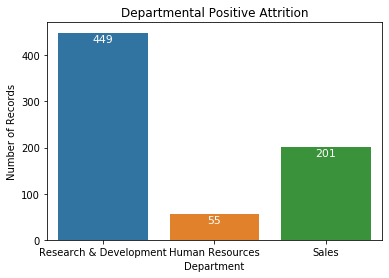

In [25]:
# Create bars
g = sb.countplot(data = df_yes, x = df_yes.Department)
plt.ylabel('Number of Records')
plt.title('Departmental Positive Attrition')
ax = g
for p in ax.patches:
             ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='white', xytext=(0, -6),
                 textcoords='offset points')

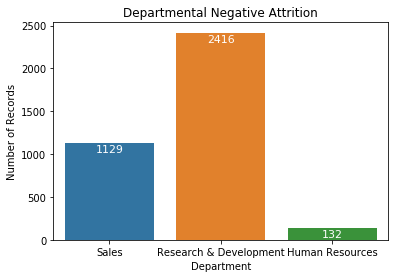

In [26]:
g = sb.countplot(data = df_no, x = df_no.Department)
plt.ylabel('Number of Records')
plt.title('Departmental Negative Attrition')
ax = g
for p in ax.patches:
             ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='white', xytext=(0, -6),
                 textcoords='offset points')

Now, let's visualize two graphs with the total of positive and negative Attrition in each Education field.

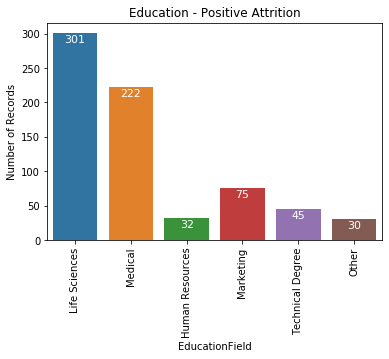

In [27]:
g = sb.countplot(data = df_yes, x = df_yes.EducationField)
plt.ylabel('Number of Records')
plt.title('Education - Positive Attrition')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
ax = g
for p in ax.patches:
             ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='white', xytext=(0, -6),
                 textcoords='offset points')

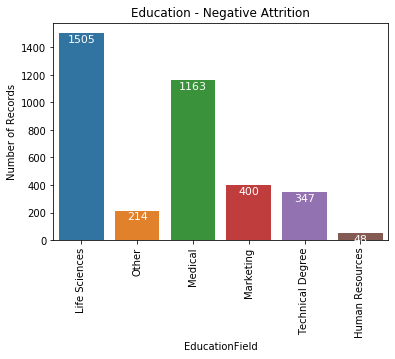

In [28]:
g = sb.countplot(data = df_no, x = df_no.EducationField)
plt.ylabel('Number of Records')
plt.title('Education - Negative Attrition')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
ax = g
for p in ax.patches:
             ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='white', xytext=(0, -6),
                 textcoords='offset points')

### Step 5 - Statistical Tests

Statistical tests are used in hypothesis testing. They can be used to:

- Determine whether a predictor variable has a statistically significant relationship with an outcome variable.

- Estimate the difference between two or more groups.

Statistical tests assume a null hypothesis of no relationship or no difference between groups. Then they determine whether the observed data fall outside of the range of values predicted by the null hypothesis.

#### Nonparametric Tests

Nonparametric statistics are called distribution-free statistics because they are not constrained by assumptions about the distribution of the population. Consequently they can easily accommodate data that have a wide range of variance. 

In [29]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,0,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,1,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,0,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,0,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,0,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [30]:
df_yes.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
1,31,1,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
6,28,1,Travel_Rarely,Research & Development,11,2,Medical,1,7,Male,...,2.0,Y,20,8,1,5.0,2,0,0,0
13,47,1,Non-Travel,Research & Development,1,1,Medical,1,14,Male,...,1.0,Y,11,8,2,10.0,4,10,9,9
28,44,1,Travel_Frequently,Research & Development,1,2,Medical,1,29,Male,...,3.0,Y,14,8,1,19.0,2,1,0,0
30,26,1,Travel_Rarely,Research & Development,4,3,Medical,1,31,Male,...,2.0,Y,11,8,0,5.0,5,3,0,2


In [31]:
df_no.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,0,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
2,32,0,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,0,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,0,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4
5,46,0,Travel_Rarely,Research & Development,8,3,Life Sciences,1,6,Female,...,3.0,Y,13,8,0,28.0,5,7,7,7


#### Mann-Whitney Test

We are going to import the corresponding library to use Mann Whitney test.

In [32]:
from scipy.stats import mannwhitneyu

Next, we are going to define a function to perform these tests in a more easier way.

In [33]:
def manwhitney(stats, p, variable):
    print('The Hypothesis statements are:')
    print('\nH0 = There is no significant difference between the different attrition values and the variable ', variable)
    print('\nHA = There is significant difference between the different attrition values and the variable ', variable, '\n')
    print('The R value is: ',stats, '\nThe P Value is: ', p,'\n')
    if p < 0.05:
        print('The Null Hypothesis H0 is rejected because P-Value < 0.05, so the Alternative Hypothesis HA is accepted')
    else:
        print("The Alternative Hypothesis H0 is rejected because P-Value >= 0.05, so the Null Hypothesis HA is accepted")

##### Attrition - Age

In [34]:
stats, p = mannwhitneyu(df_yes.Age, df_no.Age)
manwhitney(stats, p, 'Age')

The Hypothesis statements are:

H0 = There is no significant difference between the different attrition values and the variable  Age

HA = There is significant difference between the different attrition values and the variable  Age 

The R value is:  949178.0 
The P Value is:  7.98668614365882e-30 

The Null Hypothesis H0 is rejected because P-Value < 0.05, so the Alternative Hypothesis HA is accepted


##### Attrition - Distance from home

In [35]:
stats, p = mannwhitneyu(df_yes.DistanceFromHome, df_no.DistanceFromHome)
manwhitney(stats, p, 'DistanceFromHome')

The Hypothesis statements are:

H0 = There is no significant difference between the different attrition values and the variable  DistanceFromHome

HA = There is significant difference between the different attrition values and the variable  DistanceFromHome 

The R value is:  1295261.0 
The P Value is:  0.488538986087403 

The Alternative Hypothesis H0 is rejected because P-Value >= 0.05, so the Null Hypothesis HA is accepted


##### Attrition - Monthly Income

In [36]:
stats, p = mannwhitneyu(df_yes.MonthlyIncome, df_no.MonthlyIncome)
manwhitney(stats, p, 'MonthlyIncome')

The Hypothesis statements are:

H0 = There is no significant difference between the different attrition values and the variable  MonthlyIncome

HA = There is significant difference between the different attrition values and the variable  MonthlyIncome 

The R value is:  1249573.5 
The P Value is:  0.06508807631576838 

The Alternative Hypothesis H0 is rejected because P-Value >= 0.05, so the Null Hypothesis HA is accepted


##### Attrition - Number of companies worked

In [37]:
stats, p = mannwhitneyu(df_yes.NumCompaniesWorked, df_no.NumCompaniesWorked)
manwhitney(stats, p, 'NumCompaniesWorked')

The Hypothesis statements are:

H0 = There is no significant difference between the different attrition values and the variable  NumCompaniesWorked

HA = There is significant difference between the different attrition values and the variable  NumCompaniesWorked 

The R value is:  1238814.5 
The P Value is:  0.02793197853866981 

The Null Hypothesis H0 is rejected because P-Value < 0.05, so the Alternative Hypothesis HA is accepted


##### Attrition - Total Working Years

In [38]:
stats, p = mannwhitneyu(df_yes.TotalWorkingYears, df_no.TotalWorkingYears)
manwhitney(stats, p, 'TotalWorkingYears')

The Hypothesis statements are:

H0 = There is no significant difference between the different attrition values and the variable  TotalWorkingYears

HA = There is significant difference between the different attrition values and the variable  TotalWorkingYears 

The R value is:  895173.5 
The P Value is:  2.741211827689903e-39 

The Null Hypothesis H0 is rejected because P-Value < 0.05, so the Alternative Hypothesis HA is accepted


##### Attrition - Training Times Last Year

In [39]:
stats, p = mannwhitneyu(df_yes.TrainingTimesLastYear, df_no.TrainingTimesLastYear)
manwhitney(stats, p, 'TrainingTimesLastYear')

The Hypothesis statements are:

H0 = There is no significant difference between the different attrition values and the variable  TrainingTimesLastYear

HA = There is significant difference between the different attrition values and the variable  TrainingTimesLastYear 

The R value is:  1225582.0 
The P Value is:  0.008107344081224082 

The Null Hypothesis H0 is rejected because P-Value < 0.05, so the Alternative Hypothesis HA is accepted


##### Attrition - Years At Company

In [40]:
stats, p = mannwhitneyu(df_yes.YearsAtCompany, df_no.YearsAtCompany)
manwhitney(stats, p, 'YearsAtCompany')

The Hypothesis statements are:

H0 = There is no significant difference between the different attrition values and the variable  YearsAtCompany

HA = There is significant difference between the different attrition values and the variable  YearsAtCompany 

The R value is:  912579.0 
The P Value is:  3.3433144809752036e-36 

The Null Hypothesis H0 is rejected because P-Value < 0.05, so the Alternative Hypothesis HA is accepted


##### Attrition - Years Since Last Promotion

In [41]:
stats, p = mannwhitneyu(df_yes.YearsSinceLastPromotion, df_no.YearsSinceLastPromotion)
manwhitney(stats, p, 'YearsSinceLastPromotion')

The Hypothesis statements are:

H0 = There is no significant difference between the different attrition values and the variable  YearsSinceLastPromotion

HA = There is significant difference between the different attrition values and the variable  YearsSinceLastPromotion 

The R value is:  1196606.0 
The P Value is:  0.00037904698157957496 

The Null Hypothesis H0 is rejected because P-Value < 0.05, so the Alternative Hypothesis HA is accepted


##### Attrition - Years With Current Manager

In [42]:
stats, p = mannwhitneyu(df_yes.YearsWithCurrManager, df_no.YearsWithCurrManager)
manwhitney(stats, p, 'YearsWithCurrManager')

The Hypothesis statements are:

H0 = There is no significant difference between the different attrition values and the variable  YearsWithCurrManager

HA = There is significant difference between the different attrition values and the variable  YearsWithCurrManager 

The R value is:  945958.5 
The P Value is:  5.420302388722274e-31 

The Null Hypothesis H0 is rejected because P-Value < 0.05, so the Alternative Hypothesis HA is accepted


#### Seperate t-test

First, we are going to import the corresponding library to use Separate t-test.

In [43]:
from scipy.stats import ttest_ind

Next, we are going to define a function to perform these tests in a more easier way.

In [44]:
def ttest(stats, p, variable):
    print('The Hypothesis statements are:')
    print('\nH0 = There is no significant difference between the different attrition values and the variable ', variable)
    print('\nHA = There is significant difference between the different attrition values and the variable ', variable, '\n')
    print('The R value is: ',stats, '\nThe P Value is: ', p,'\n')
    if p < 0.05:
        print('The Null Hypothesis H0 is rejected because P-Value < 0.05, so the Alternative Hypothesis HA is accepted')
    else:
        print("The Alternative Hypothesis H0 is rejected because P-Value >= 0.05, so the Null Hypothesis HA is accepted")

##### Attrition - Age

In [45]:
stats, p = ttest_ind(df_yes.Age, df_no.Age)
ttest(stats, p, 'Age')

The Hypothesis statements are:

H0 = There is no significant difference between the different attrition values and the variable  Age

HA = There is significant difference between the different attrition values and the variable  Age 

The R value is:  -10.617111568458819 
The P Value is:  5.126598219406314e-26 

The Null Hypothesis H0 is rejected because P-Value < 0.05, so the Alternative Hypothesis HA is accepted


##### Attrition - Distance from home

In [46]:
stats, p = ttest_ind(df_yes.DistanceFromHome, df_no.DistanceFromHome)
ttest(stats, p, 'DistanceFromHome')

The Hypothesis statements are:

H0 = There is no significant difference between the different attrition values and the variable  DistanceFromHome

HA = There is significant difference between the different attrition values and the variable  DistanceFromHome 

The R value is:  -0.6253536318706914 
The P Value is:  0.5317715668047676 

The Alternative Hypothesis H0 is rejected because P-Value >= 0.05, so the Null Hypothesis HA is accepted


##### Attrition - Monthly Income

In [47]:
stats, p = ttest_ind(df_yes.MonthlyIncome, df_no.MonthlyIncome)
ttest(stats, p, 'MonthlyIncome')

The Hypothesis statements are:

H0 = There is no significant difference between the different attrition values and the variable  MonthlyIncome

HA = There is significant difference between the different attrition values and the variable  MonthlyIncome 

The R value is:  -1.9969640177214658 
The P Value is:  0.045890862744972095 

The Null Hypothesis H0 is rejected because P-Value < 0.05, so the Alternative Hypothesis HA is accepted


##### Attrition - Number of companies worked

In [48]:
stats, p = ttest_ind(df_yes.NumCompaniesWorked, df_no.NumCompaniesWorked)
ttest(stats, p, 'NumCompaniesWorked')

The Hypothesis statements are:

H0 = There is no significant difference between the different attrition values and the variable  NumCompaniesWorked

HA = There is significant difference between the different attrition values and the variable  NumCompaniesWorked 

The R value is:  2.837197670884213 
The P Value is:  0.004572057121646456 

The Null Hypothesis H0 is rejected because P-Value < 0.05, so the Alternative Hypothesis HA is accepted


##### Attrition - Total Working Years

In [49]:
stats, p = ttest_ind(df_yes.TotalWorkingYears, df_no.TotalWorkingYears)
ttest(stats, p, 'TotalWorkingYears')

The Hypothesis statements are:

H0 = There is no significant difference between the different attrition values and the variable  TotalWorkingYears

HA = There is significant difference between the different attrition values and the variable  TotalWorkingYears 

The R value is:  -11.39422669317641 
The P Value is:  1.1645434967153693e-29 

The Null Hypothesis H0 is rejected because P-Value < 0.05, so the Alternative Hypothesis HA is accepted


##### Attrition - Training Times Last Year

In [50]:
stats, p = ttest_ind(df_yes.TrainingTimesLastYear, df_no.TrainingTimesLastYear)
ttest(stats, p, 'TrainingTimesLastYear')

The Hypothesis statements are:

H0 = There is no significant difference between the different attrition values and the variable  TrainingTimesLastYear

HA = There is significant difference between the different attrition values and the variable  TrainingTimesLastYear 

The R value is:  -3.152870411721613 
The P Value is:  0.00162766036355604 

The Null Hypothesis H0 is rejected because P-Value < 0.05, so the Alternative Hypothesis HA is accepted


##### Attrition - Years At Company

In [51]:
stats, p = ttest_ind(df_yes.YearsAtCompany, df_no.YearsAtCompany)
ttest(stats, p, 'YearsAtCompany')

The Hypothesis statements are:

H0 = There is no significant difference between the different attrition values and the variable  YearsAtCompany

HA = There is significant difference between the different attrition values and the variable  YearsAtCompany 

The R value is:  -8.881225486705604 
The P Value is:  9.476118084889976e-19 

The Null Hypothesis H0 is rejected because P-Value < 0.05, so the Alternative Hypothesis HA is accepted


##### Attrition - Years Since Last Promotion

In [52]:
stats, p = ttest_ind(df_yes.YearsSinceLastPromotion, df_no.YearsSinceLastPromotion)
ttest(stats, p, 'YearsSinceLastPromotion')

The Hypothesis statements are:

H0 = There is no significant difference between the different attrition values and the variable  YearsSinceLastPromotion

HA = There is significant difference between the different attrition values and the variable  YearsSinceLastPromotion 

The R value is:  -2.080660880277173 
The P Value is:  0.03752293607413772 

The Null Hypothesis H0 is rejected because P-Value < 0.05, so the Alternative Hypothesis HA is accepted


##### Attrition - Years With Current Manager

In [53]:
stats, p = ttest_ind(df_yes.YearsWithCurrManager, df_no.YearsWithCurrManager)
ttest(stats, p, 'YearsWithCurrManager')

The Hypothesis statements are:

H0 = There is no significant difference between the different attrition values and the variable  YearsWithCurrManager

HA = There is significant difference between the different attrition values and the variable  YearsWithCurrManager 

The R value is:  -10.362463400192302 
The P Value is:  7.105369646808081e-25 

The Null Hypothesis H0 is rejected because P-Value < 0.05, so the Alternative Hypothesis HA is accepted


### Step 6 - Unsupervised Learning (Correlation Analysis)

Correlation analysis is a statistical method used to evaluate the strength of relationship between two quantitative variables. A high correlation means that two or more variables have a strong relationship with each other, while a weak correlation means that the variables are hardly related. 

In other words, it is the process of studying the strength of that relationship with available statistical data. 

In [54]:
#Importing libraries
from scipy.stats import pearsonr

Doing a further inspectin to the data, we saw that the columns of 'EmployeeCount' and 'StandardHours' have the same repetitive value in each of them, so we are going to remove them as this has no real impact in defining the correlation.

In [55]:
df = df.drop(['EmployeeCount', 'StandardHours'], axis = 1)
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobLevel,...,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,0,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,...,131160,1.0,Y,11,0,1.0,6,1,0,0
1,31,1,Travel_Frequently,Research & Development,10,1,Life Sciences,2,Female,1,...,41890,0.0,Y,23,1,6.0,3,5,1,4
2,32,0,Travel_Frequently,Research & Development,17,4,Other,3,Male,4,...,193280,1.0,Y,15,3,5.0,2,5,0,3
3,38,0,Non-Travel,Research & Development,2,5,Life Sciences,4,Male,3,...,83210,3.0,Y,11,3,13.0,5,8,7,5
4,32,0,Travel_Rarely,Research & Development,10,1,Medical,5,Male,1,...,23420,4.0,Y,12,2,9.0,2,6,0,4


Plotting a heatmap, we can have a general idea of how each variable is correlated to Attrition. The darker the color, the more correlated the variable is.

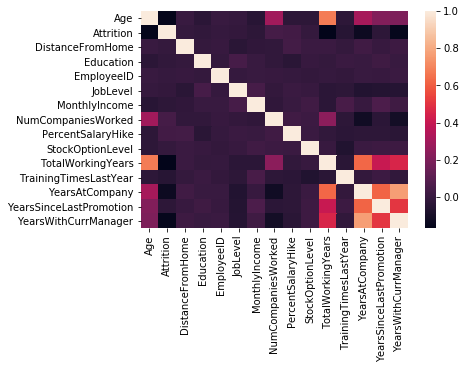

In [56]:
corr = df.corr()
sb.heatmap(corr)

We can do a more detailed calculation by obtaining the r and p value of each variable.

##### Attrition - Age correlation

In [57]:
stats, p = pearsonr(df.Attrition, df.Age)
print("The r value is: ", stats, "\nThe p value is: ", p)

if(p < 0.05):
    print("The null hypothesis is rejected, so there is significant correlation between both variables.")
else:
    print("The null hypothesis is accepted, so there is no significant correlation between both variables.")

The r value is:  -0.15839867954096706 
The p value is:  5.1265982193780794e-26
The null hypothesis is rejected, so there is significant correlation between both variables.


As the result above states, Age has a significant correlation with Attrition, because the p value is bellow 0.05.

##### Attrition - DistanceFromHome correlation

In [58]:
stats, p = pearsonr(df.Attrition, df.DistanceFromHome)
print("The r value is: ", stats, "\nThe p value is: ", p)

if(p < 0.05):
    print("The null hypothesis is rejected, so there is significant correlation between both variables.")
else:
    print("The null hypothesis is accepted, so there is no significant correlation between both variables.")

The r value is:  -0.009448638515156243 
The p value is:  0.5317715668019558
The null hypothesis is accepted, so there is no significant correlation between both variables.


As the result above states, the distance from home has no significant correlation with Attrition, because the p value is above 0.05.

##### Attrition - MonthlyIncome correlation

In [59]:
stats, p = pearsonr(df.Attrition, df.MonthlyIncome)
print("The r value is: ", stats, "\nThe p value is: ", p)

if(p < 0.05):
    print("The null hypothesis is rejected, so there is significant correlation between both variables.")
else:
    print("The null hypothesis is accepted, so there is no significant correlation between both variables.")

The r value is:  -0.030160293808460668 
The p value is:  0.045890862744719166
The null hypothesis is rejected, so there is significant correlation between both variables.


As the result above states, monthly income has a significant correlation with Attrition, because the p value is bellow 0.05.

##### Attrition - NumCompaniesWorked correlation

In [60]:
stats, p = pearsonr(df.Attrition, df.NumCompaniesWorked)
print("The r value is: ", stats, "\nThe p value is: ", p)

if(p < 0.05):
    print("The null hypothesis is rejected, so there is significant correlation between both variables.")
else:
    print("The null hypothesis is accepted, so there is no significant correlation between both variables.")

The r value is:  0.042830567244720875 
The p value is:  0.004572057121620842
The null hypothesis is rejected, so there is significant correlation between both variables.


As the result above states, the total number of companies the employee has worked for has a significant correlation with Attrition, because the p value is bellow 0.05.

##### Attrition - TotalWorkingYears correlation

In [61]:
stats, p = pearsonr(df.Attrition, df.TotalWorkingYears)
print("The r value is: ", stats, "\nThe p value is: ", p)

if(p < 0.05):
    print("The null hypothesis is rejected, so there is significant correlation between both variables.")
else:
    print("The null hypothesis is accepted, so there is no significant correlation between both variables.")

The r value is:  -0.16966991684723917 
The p value is:  1.1645434967091854e-29
The null hypothesis is rejected, so there is significant correlation between both variables.


As the result above states, the total number of years the employee has worked has a significant correlation with Attrition, because the p value is bellow 0.05.

##### Attrition - TrainingTimesLastYear correlation

In [62]:
stats, p = pearsonr(df.Attrition, df.TrainingTimesLastYear)
print("The r value is: ", stats, "\nThe p value is: ", p)

if(p < 0.05):
    print("The null hypothesis is rejected, so there is significant correlation between both variables.")
else:
    print("The null hypothesis is accepted, so there is no significant correlation between both variables.")

The r value is:  -0.04758573693081737 
The p value is:  0.0016276603635477602
The null hypothesis is rejected, so there is significant correlation between both variables.


As the result above states, the number of times training was conducted for the employee last year has a significant correlation with Attrition, because the p value is bellow 0.05.

##### Attrition - YearsAtCompany correlation

In [63]:
stats, p = pearsonr(df.Attrition, df.YearsAtCompany)
print("The r value is: ", stats, "\nThe p value is: ", p)

if(p < 0.05):
    print("The null hypothesis is rejected, so there is significant correlation between both variables.")
else:
    print("The null hypothesis is accepted, so there is no significant correlation between both variables.")

The r value is:  -0.13300261842521538 
The p value is:  9.476118084840815e-19
The null hypothesis is rejected, so there is significant correlation between both variables.


As the result above states, the total number of years spent at the company by the employee has a significant correlation with Attrition, because the p value is bellow 0.05.

##### Attrition - YearsSinceLastPromotion correlation

In [64]:
stats, p = pearsonr(df.Attrition, df.YearsSinceLastPromotion)
print("The r value is: ", stats, "\nThe p value is: ", p)

if(p < 0.05):
    print("The null hypothesis is rejected, so there is significant correlation between both variables.")
else:
    print("The null hypothesis is accepted, so there is no significant correlation between both variables.")

The r value is:  -0.03142315056330995 
The p value is:  0.03752293607395154
The null hypothesis is rejected, so there is significant correlation between both variables.


As the result above states, the number of years since last promotion has a significant correlation with Attrition, because the p value is bellow 0.05.

##### Attrition - YearsWithCurrManager correlation

In [65]:
stats, p = pearsonr(df.Attrition, df.YearsWithCurrManager)
print("The r value is: ", stats, "\nThe p value is: ", p)

if(p < 0.05):
    print("The null hypothesis is rejected, so there is significant correlation between both variables.")
else:
    print("The null hypothesis is accepted, so there is no significant correlation between both variables.")

The r value is:  -0.15469153690287274 
The p value is:  7.105369646771178e-25
The null hypothesis is rejected, so there is significant correlation between both variables.


As the result above states, the number of years under current manager has a significant correlation with Attrition, because the p value is bellow 0.05.

#### Inference from above analysis

1. Attrition with Age: As r = -0.1583, there’s low negative correlation between both variables. As the P value is < 0.05, the null hypothesis is rejected, so there is significant correlation between both variables.


2. Attrition with Distance from Home: As r = -0.0094, there’s low negative correlation between both variables. As the P value is > 0.05, the null hypothesis is accepted, so there is no significant correlation between both variables.


3. Attrition with Monthly Income: As r = -0.0301, there’s low negative correlation between both variables. As the P value is < 0.05, the null hypothesis is rejected, so there is significant correlation between both variables.


4. Attrition with Num of companies worked: As r = 0.0428, there’s low positive correlation between both variables. As the P value is < 0.05, the null hypothesis is rejected, so there is significant correlation between both variables.


5. Attrition with Total working years:  As r = -0.1696, there’s low negative correlation between both variables. As the P value is < 0.05, the null hypothesis is rejected, so there is significant correlation between both variables.


6. Attrition with Training times last year:  As r = -0.0475, there’s low negative correlation between both variables. As the P value is < 0.05, the null hypothesis is rejected, so there is significant correlation between both variables.


7. Attrition with years at company: As r = -0.1330, there’s low negative correlation between both variables. As the P value is < 0.05, the null hypothesis is rejected, so there is significant correlation between both variables.


8. Attrition with Years since last promotion: As r = -0.0314, there’s low negative correlation between both variables. As the P value is < 0.05, the null hypothesis is rejected, so there is significant correlation between both variables.


9. Attriton and Years with current manager: As r = -0.1546, there’s low negative correlation between both variables. As the P value is < 0.05, the null hypothesis is rejected, so there is significant correlation between both variables.